# Projeto 3 (Ciência dos dados)

___
<div id="indice"></indice>

1. [Bibliotecas utilizadas](#bibliotecas)
2. [Objetivo do projeto](#projeto)
3. [Separando as bases de dados](#bases)
4. [Modelo Random Forest](#forest)
5. [Modelo de Regressão OLS](#regressao)
6. [Comparação de modelos](#erros)
7. [Conclusão](#conclusao)

___
<div id="bibliotecas"></div>

## Importando as bibliotecas necessárias

In [9]:
#importações necessárias

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [10]:
dados = pd.read_csv("pnad23_filtrado.csv")
dados.head(5)

,Estado,Sexo,Idade,Cor_ou_Raça,Escolaridade,Ocupação,Faixa_de_rendimento,Rendimento_Bruto
0,Rondônia,Homem,30,Parda,Regular do ensino médio ou do 2º grau,Conta Própria,[3SM]+1 a [5SM],5000.0
1,Rondônia,Mulher,50,Parda,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3500.0
2,Rondônia,Mulher,54,Branca,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3700.0
3,Rondônia,Homem,36,Parda,Regular do ensino fundamental ou do 1º grau,Conta Própria,[2SM]+1 a [3SM],3300.0
4,Rondônia,Homem,33,Branca,Regular do ensino médio ou do 2º grau,Conta Própria,[2SM]+1 a [3SM],3500.0


___
<div id="projeto"></div>

## O Projeto
Com o objetivo de prever o salário mais provável de uma pessoa, baseando-se nas suas características socioeconômicas, este projeto utiliza os microdados da PNAD Contínua.
Para construir um modelo preditivo, foi feito a escolha da nossa Target, sendo esta o rendimento bruto, e a seleção das variáveis explicativas , sendo estas escolaridade, idade, gênero, localização geográfica, ocupação, cor/raça e faixa de rendimento. 
A análise exploratória dos dados foi feita no arquivo Jupyter [analise_exploratória.iypnb](analise_exploratoria.ipynb)

Para atingir o objetivo foi necessário aplicar dois modelos preditivos, cujas precisões e resultados foram comparados a fim de decidir qual o modelo mais adequado para o porblema.


[Índice](#indice)

___
<div id="bases"></div>

## Separando a base de treino e teste 

In [11]:
dados.isnull().sum()

Estado                 0
Sexo                   0
Idade                  0
Cor_ou_Raça            0
Escolaridade           0
Ocupação               0
Faixa_de_rendimento    0
Rendimento_Bruto       0
dtype: int64

In [12]:
dados.dtypes

Estado                  object
Sexo                    object
Idade                    int64
Cor_ou_Raça             object
Escolaridade            object
Ocupação                object
Faixa_de_rendimento     object
Rendimento_Bruto       float64
dtype: object

In [13]:
x_colunas = dados[['Estado', 'Sexo', 'Idade', 'Cor_ou_Raça', 'Escolaridade', 'Ocupação','Faixa_de_rendimento']]

y_colunas = dados[['Rendimento_Bruto']]


### Para separar as bases em treino e teste é necessário aplicar o get_dummies(), para as variáveis categoricas poderem ser utilizadas no modelo

In [14]:
x_dummies = pd.get_dummies(x_colunas)
x_dummies = x_dummies.astype(int)
x_dummies.dtypes

Idade                                   int32
Estado_Acre                             int32
Estado_Alagoas                          int32
Estado_Amapá                            int32
Estado_Amazonas                         int32
                                        ...  
Faixa_de_rendimento_[1SM]+1 a [2SM]     int32
Faixa_de_rendimento_[20SM]+1 ou mais    int32
Faixa_de_rendimento_[2SM]+1 a [3SM]     int32
Faixa_de_rendimento_[3SM]+1 a [5SM]     int32
Faixa_de_rendimento_[5SM]+1 a [10SM]    int32
Length: 65, dtype: object

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies ,y_colunas , test_size=0.33, random_state= 42 )

In [16]:
x_train

,Idade,Estado_Acre,Estado_Alagoas,Estado_Amapá,Estado_Amazonas,Estado_Bahia,Estado_Ceará,Estado_Distrito Federal,Estado_Espirito Santo,Estado_Goiás,...,"Ocupação_Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar",Ocupação_Trabalhador doméstico,"Faixa_de_rendimento_1 a [0,5SM]","Faixa_de_rendimento_[0,5SM]+1 a [1SM]",Faixa_de_rendimento_[10SM]+1 a [20SM],Faixa_de_rendimento_[1SM]+1 a [2SM],Faixa_de_rendimento_[20SM]+1 ou mais,Faixa_de_rendimento_[2SM]+1 a [3SM],Faixa_de_rendimento_[3SM]+1 a [5SM],Faixa_de_rendimento_[5SM]+1 a [10SM]
9255,20,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
83381,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
103097,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
139202,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
103004,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
103694,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
131932,32,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
146867,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


___
<div id="forest"></div>

## Aplicando o modelo Random Forest

[Índice](#indice)

In [17]:
random_model = RandomForestRegressor(n_estimators=100, random_state = 42 )

### Ensinando o modelo, para que consiga encontrar os padrões

In [18]:
random_model.fit(x_train, y_train)

c:\Users\rafav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

### Nas celulas abaixo utilizamos as métricas MAE(Erro médio absoluto), MSE(Erro médio quadrático) e $R^2$(Coeficiente de determinação que mede quanto da variância dos modelos reais é explicada pelo modelo)

In [19]:
y_prev_train = random_model.predict(x_train)
mae = mean_absolute_error(y_train, y_prev_train)
mse = mean_squared_error(y_train, y_prev_train)
r2 = r2_score(y_train, y_prev_train)
mae, mse, r2

(210.69812439007617, 463390.5781934575, 0.971475393335519)

O MAE indica que o modelo errou, em média, 210.69 unidades nas previsões. Um erro baixo, indicando uma boa performance nos dados de treino.

O valor do MSE é 46390.57. Esse número é maior devido à penalização de erros maiores.

O valor de $R^2$ foi de 0.97, indicando que o modelo está ajustado para a base de treino, mas o bom desempenho não garante que seja bom com os dados de teste.

In [20]:
y_prev = random_model.predict(x_test)
mse = mean_squared_error(y_test, y_prev)
r2 = r2_score(y_test, y_prev)
mae = mean_absolute_error(y_test, y_prev)
mae, mse, r2 

(434.50358136448807, 3465863.87181802, 0.7714871476759115)

O MAE indica que o modelo errou, em média, 434.50 unidades nas previsões. Valor maior do que nos dados de treino. Indicando dificuldade em generalizar.

O valor do MSE é 3465863.87. Mostrando um aumento considerável nos erros grandes.

O valor de $R^2$ foi de 0.77, mostrando que ainda explica boa parte da variância nos dados de teste, mas com desempenho inferior do que com os dados de treino.

O modelo se saiu muito bem com a base de treino, porém seu desempenho caiu quando foi  utilizada a base de teste, sugerindo um pouco de overfitting.
Overfitting é justamente quando um modelo se sai muito bem com os dados de treino, porém seu desempenho cai com os dados de treino.

___
<div id='regressao'></div>

## Modelo de regressão (OLS)

[Índice](#indice)

Nessa etapa será aplicado à base de dados o mesmo modelo de regressão linear visto na <strong>AULA 28</strong>

In [21]:
# Função utilitária para fazer a regressão 
# com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

A seguir serão removidas as colunas da base de dados `x_train` que possuirem valor-p menor do que o nível de significância ($\alpha$) estabelecido pelo grupo como 5%

### Criando uma função que retorna o maior valor P da regressão

In [22]:
def maior_valor_p(model):
    valores_p = model.pvalues.drop('const')
    return valores_p.idxmax(), valores_p.max()

### Iterando na base de dados de teste para retirar os valores com um valor p maior que 0.05

In [23]:
removidos_treino = []

while True:
    modelo = regress(y_train, x_train)
    coluna, valor = maior_valor_p(modelo)
    removidos_treino.append(coluna)
    if valor < 0.05:
        break
    x_train = x_train.drop(columns=[coluna])

# treino final
treino_final = regress(y_train, x_train)
treino_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Rendimento_Bruto   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     9898.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:28:41   Log-Likelihood:            -1.0440e+06
No. Observations:              117371   AIC:                         2.088e+06
Df Residuals:                  117320   BIC:                         2.089e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                          5465.7180     15.122    361.440      0.000    5436.079    5495.357
Idade                                                                                                             1.1898      0.463      2.572      0.010       0.283       2.097
Estado_Acre                                                                                                     244.2887     40.931      5.968      0.000     164.065     324.513
Estado_Alagoas                                                                                                  185.3557     28.360      6.536      0.000     129.771     240.941
Estado_Amapá                                                                                                    265.4202     52.813      5.026      0.000     161.908     368.933
Estado_Amazonas                                                                                                 247.4172     31.367      7.888      0.000     185.939     308.895
Estado_Bahia                                                                                                    179.8237     25.458      7.064      0.000     129.926     229.721
Estado_Ceará                                                                                                    170.2628     25.878      6.580      0.000     119.543     220.983
Estado_Distrito Federal                                                                                         222.4260     34.388      6.468      0.000     155.026     289.826
Estado_Espirito Santo                                                                                           191.6611     25.732      7.448      0.000     141.227     242.095
Estado_Goiás                                                                                                    233.9403     25.955      9.013      0.000     183.070     284.811
Estado_Maranhão                                                                                                 175.6466     23.745      7.397      0.000     129.106     222.187
Estado_Mato Grosso                                                                                              222.9778     29.561      7.543      0.000     165.039     280.917
Estado_Mato Grosso do Sul                                                                                       280.1673     31.548      8.881      0.000     218.333     342.001
Estado_Minas Gerais                                      

### Atualizando a base de dados de teste

Após a remoção das colunas da base de dados de treino, será feito o mesmo processo, porém com a base de dados de teste

In [24]:
# Loop para tirar os valores maiores que 0.05
removidos_modelo = []

while True:
    modelo = regress(y_test, x_test)
    coluna, valor = maior_valor_p(modelo)
    removidos_modelo.append(coluna)
    if valor < 0.05:
        break
    x_test = x_test.drop(columns=[coluna])

# Modelo final
modelo_final = regress(y_test, x_test)
modelo_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Rendimento_Bruto   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.245e+04
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:28:46   Log-Likelihood:            -5.0541e+05
No. Observations:               57810   AIC:                         1.011e+06
Df Residuals:                   57783   BIC:                         1.011e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                          5450.7973     17.968    303.360      0.000    5415.580    5486.015
Idade                                                                                                             3.3262      0.569      5.845      0.000       2.211       4.441
Estado_Goiás                                                                                                    161.3284     33.259      4.851      0.000      96.141     226.516
Estado_Minas Gerais                                                                                              72.9930     22.900      3.188      0.001      28.110     117.876
Estado_Rio Grande do Sul                                                                                         61.3905     26.720      2.298      0.022       9.019     113.762
Estado_Santa Catarina                                                                                            50.6423     24.297      2.084      0.037       3.021      98.264
Sexo_Homem                                                                                                     2762.3411     11.363    243.094      0.000    2740.069    2784.613
Sexo_Mulher                                                                                                    2688.4562     11.448    234.848      0.000    2666.019    2710.894
Escolaridade_Antigo científico, clássico, etc. (médio 2º ciclo)                                                -226.5219    106.776     -2.121      0.034    -435.803     -17.240
Escolaridade_Antigo ginásio (médio 1º ciclo)                                                                   -265.8328     83.667     -3.177      0.001    -429.820    -101.846
Escolaridade_Antigo primário (elementar)                                                                       -236.8256     38.709     -6.118      0.000    -312.696    -160.955
Escolaridade_Classe de alfabetização - CA                                                                      -259.7821     75.888     -3.423      0.001    -408.523    -111.041
Escolaridade_Educação de jovens e adultos (EJA) ou supletivo do 1º grau                                        -183.8429     70.407     -2.611      0.009    -321.841     -45.844
Escolaridade_Educação de jovens e adultos (EJA) ou supletivo do 2º grau                                        -135.1166     50.845     -2.657      0.008    -234.773     -35.460
Escolaridade_Regular do ensino fundamental ou do 1º grau 

In [25]:
print(removidos_modelo)

['Cor_ou_Raça_Ignorado', 'Escolaridade_Creche (disponível apenas no questionário anual de educação)', 'Escolaridade_Especialização de nível superior', 'Escolaridade_Doutorado', 'Cor_ou_Raça_Amarela', 'Cor_ou_Raça_Preta', 'Cor_ou_Raça_Indigena', 'Cor_ou_Raça_Parda', 'Escolaridade_Mestrado', 'Cor_ou_Raça_Branca', 'Escolaridade_Superior - graduação', 'Escolaridade_Pré-escola', 'Escolaridade_Alfabetização de jovens e adultos', 'Estado_Roraima', 'Estado_Distrito Federal', 'Estado_Piaui', 'Estado_Pará', 'Estado_Sergipe', 'Estado_Ceará', 'Estado_Rio Grande do Norte', 'Estado_Rondônia', 'Estado_Tocantins', 'Estado_Maranhão', 'Estado_Pernambuco', 'Estado_Bahia', 'Estado_Mato Grosso do Sul', 'Estado_Alagoas', 'Estado_Amazonas', 'Estado_Acre', 'Estado_Espirito Santo', 'Estado_Amapá', 'Estado_São Paulo', 'Estado_Rio de Janeiro', 'Estado_Paraná', 'Estado_Mato Grosso', 'Estado_Paraíba', 'Estado_Santa Catarina']


In [26]:
modelo_ols_teste = sm.OLS(y_test, x_test).fit()

In [27]:
y_teste_previsto = modelo_ols_teste.predict(x_test)

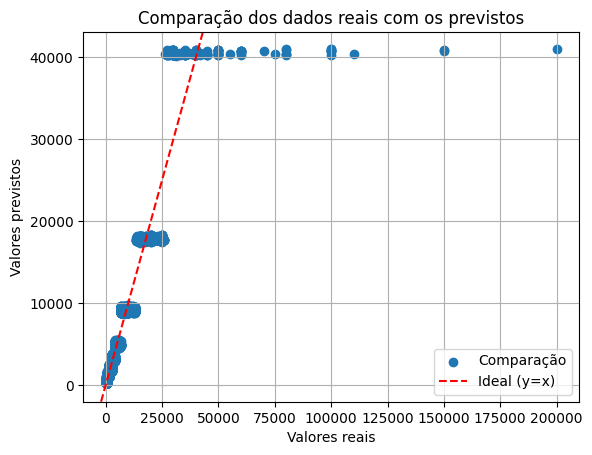

In [28]:
plt.scatter(y_test, y_teste_previsto, label='Comparação');
plt.axline([0, 0], [1, 1], color="red", linestyle="--", label="Ideal (y=x)")
plt.legend()
plt.title("Comparação dos dados reais com os previstos")
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.grid() 

___
<div id="erros"></div>

## Comparação entre modelos

[Índice](#indice)

### Calculando o erro do modelo

In [29]:
# Calcular o erro quadrático médio (MSE) usando os resíduos
mse_ols = mean_squared_error(y_teste_previsto, modelo_final.fittedvalues)
print(f"Erro Quadrático Médio (MSE) do modelo OLS: {mse_ols}")

# Calcular o erro absoluto médio (MAE) usando os resíduos
mae_ols = mean_absolute_error(y_teste_previsto, modelo_final.fittedvalues)
print(f"Erro Absoluto Médio (MAE) do modelo OLS: {mae_ols}")

# Calcular o coeficiente de determinação (R²)
r2_ols = modelo_final.rsquared
print(f"Coeficiente de Determinação (R²) do modelo OLS: {r2_ols}")

Erro Quadrático Médio (MSE) do modelo OLS: 1.4751870076781463e-21
Erro Absoluto Médio (MAE) do modelo OLS: 3.167882848160799e-11
Coeficiente de Determinação (R²) do modelo OLS: 0.8485308688553395


### Comparando os 2 modelos

In [30]:
comparacao_performance = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R²'],
    'OLS': [mse_ols, mae_ols, r2_ols],
    'Random Forest': [mse, mae, r2]
})
print("Comparação das métricas de desempenho:")
print(comparacao_performance)


Comparação das métricas de desempenho:
  Métrica           OLS  Random Forest
0     MSE  1.475187e-21   3.465864e+06
1     MAE  3.167883e-11   4.345036e+02
2      R²  8.485309e-01   7.714871e-01


___

<div id="conclusao"></div>

## Conclusão

[Índice](#indice)

Após a análise dos resultados de ambos os modelos, o grupo perceu que, apesar de demorar mais para ser compilado, o modelo de predição mais adequado para o [objetivo](#projeto) estabelecido previamente, uma vez que o tempo acrescentado ao período de processamento não é tão grande para a base de dados fornecida, e dado que o parâmetro $R^2$ é mais favorável no caso desse modelo do que se comparado ao modelo OLS, o qual se destacou na velocidade de processamento, e por ser mais favorável a outras métricas, tais como $MSE$ e $MAE$